In [1]:
import evaluate
import Utils
import network
import matplotlib.pyplot as plt

import numpy as np

from matplotlib import colors

In [2]:
image_num = 5
model = network.Conv64Features()
D = 20

In [3]:
real_disp = Utils.get_disp_image(image_num)
predicted_disp = evaluate.predict_disparity_map(image_num, model, D)

In [4]:
accuracy = np.zeros(real_disp.shape)

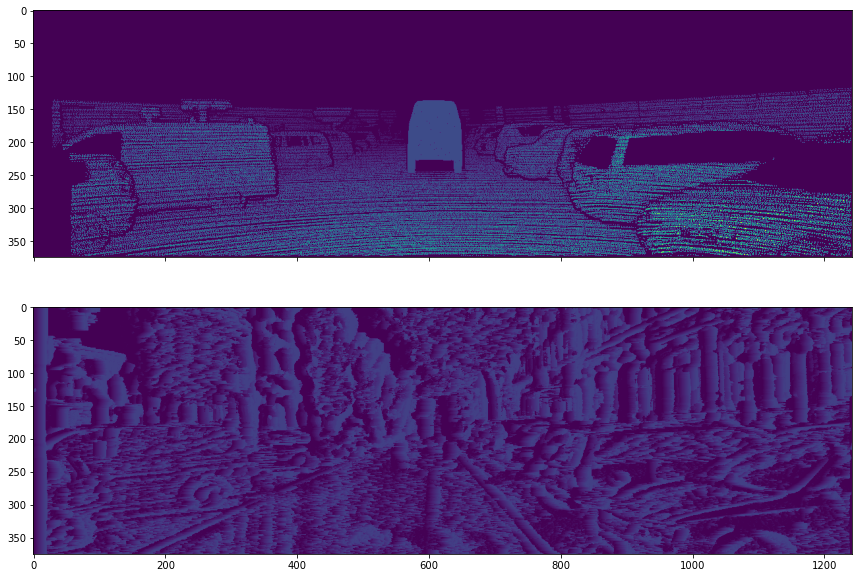

In [5]:
fig, axes = plt.subplots(2, 1, sharex=True)
fig.set_size_inches(20, 10)
axes[0].imshow(real_disp, vmin=0, vmax=100)
axes[1].imshow(predicted_disp, vmin=0, vmax=100)

In [6]:
accuracy[real_disp != 0] = -1
accuracy[(real_disp != 0) & (np.abs(real_disp - predicted_disp) < 3)] = 1

In [7]:
accuracy.mean()

-0.18765432098765433

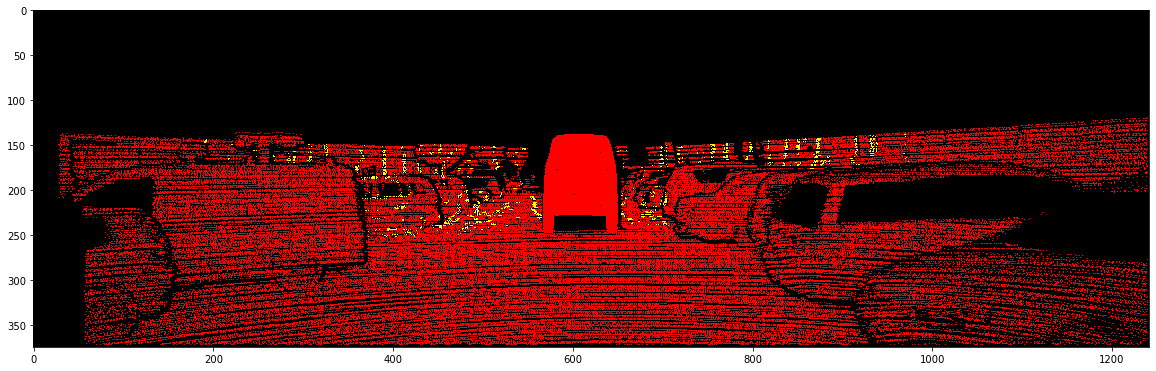

In [8]:
plt.figure(figsize = (20,10))
cmap = colors.ListedColormap(['red', 'black', 'yellow'])
plt.imshow(accuracy, cmap=cmap)